In [1]:
import splat
import matplotlib.pyplot as plt
splat.initializeStandards()
%matplotlib inline

/users/caganze/research/splat


Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
import glob
import pandas as pd
from astropy.io import ascii
import numpy as np

In [3]:
import astropy.units as u

In [4]:
#get y dwarfs
def get_shortname(n):
        return splat.designationToShortName(n).replace('J', 'WISE')

schn='/Volumes/Lacie/schneider/*.txt'
schntb=pd.read_csv('/Volumes/Lacie/wispsdata/data/schneider2015.txt', 
                   delimiter=' ').drop(columns='Unnamed: 14')
schntb['shortname']=schntb.Name.apply(get_shortname)
spectra_schn=[]
for f in glob.glob(schn):
    d=ascii.read(f).to_pandas()
    shortname=(f.split('/')[-1]).split('.txt')[0]
    s=splat.Spectrum(wave=d.col1, 
                     flux=d.col2,
                     noise=d.col3, 
                     name=shortname)
    #measure snr 
    mask= np.logical_and(d.col1>1.0, d.col1<2.4)
    snr= (np.nanmedian(d.col2[mask]/d.col3[mask]))
    spectra_schn.append(s)

[Text(0.5, 0, 'wave (micron)'), Text(0, 0.5, 'flux (micron)')]

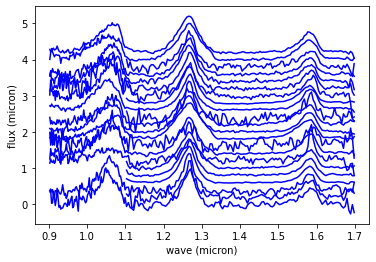

In [5]:
fig, ax=plt.subplots()
for idx, s in enumerate(spectra_schn):
    s.normalize()
    ax.plot(s.wave, s.flux.value+idx/5, c='b')

ax.set(xlabel='wave (micron)', ylabel='flux (micron)')

In [6]:
#Y0–WISE J173835.53+273259.0 (HST/WFC3; Cushing et al. 2011), and Y1–WISE J035000.32–565830.2 (HST/WFC3; Kirkpatrick et al. 2012).

In [7]:
#spectra_schn= spectra_schn.flatten()

In [8]:
yo_std=[x for x in spectra_schn if x.name=='WISE1738+2732'][0]
y1_std=[x for x in spectra_schn if x.name=='WISE0350-5658'][0]

In [9]:
#import splat.database as spd
#spd.addUserSpectra(folder='/Volumes/Lacie/schneider/',\
#                              instrument='HST-WFC3',mode='update',search_str='*.txt',\
#        verbose=True)

In [10]:
yo_std.noise

<Quantity [0.0241094 , 0.0208718 , 0.01860357, 0.01760464, 0.01709726,
           0.01726601, 0.0172777 , 0.01701685, 0.01785194, 0.01680193,
           0.01555207, 0.01590856, 0.01595893, 0.01512638, 0.01527113,
           0.01461686, 0.01444943, 0.01540987, 0.01480317, 0.01391716,
           0.01328193, 0.013035  , 0.01317351, 0.01373701, 0.01474162,
           0.01347795, 0.01378607, 0.01354033, 0.0145536 , 0.01504311,
           0.01479443, 0.01579233, 0.016049  , 0.0164338 , 0.01788833,
           0.01797125, 0.01725484, 0.01619826, 0.01500792, 0.01394099,
           0.01308992, 0.01235373, 0.0117577 , 0.01124206, 0.01079982,
           0.01081703, 0.01049858, 0.01061926, 0.01030358, 0.00988046,
           0.0097127 , 0.00971658, 0.00963187, 0.0094779 , 0.00936804,
           0.00934024, 0.00939677, 0.00991128, 0.01017674, 0.01017184,
           0.00986222, 0.00989175, 0.00959844, 0.00971839, 0.00954966,
           0.00918796, 0.00944974, 0.00966938, 0.01018674, 0.00995427,
      

In [11]:
y0_spex=splat.Spectrum(wave=yo_std.wave, flux=yo_std.flux, noise=yo_std.noise, 
                       instrument='WFC3-G141',
                       name='WISE1738+2732',
                       jmag=19.470,jmag_error=0.08,
                       hmag=20.24, hmag_error=0.08)

y1_spex=splat.Spectrum(wave=y1_std.wave, flux=y1_std.flux, noise=y1_std.noise, 
                       instrument='WFC3-G141', 
                       name='WISE0350-5658', jmag=22.09,jmag_error=0.1,
                       hmag=22.51, hmag_error=0.2)

In [12]:
y0_spex.save('/users/caganze/research/splat/resources/spectra/spex-prism/1738_2732.fits')
y1_spex.save('/users/caganze/research/splat/resources/spectra/spex-prism/0350_5658.fits')


In [13]:
#data=pd.DataFrame({'name': ['WISE1738+2732', 'WISE0350-5658'], 'spec':[y0_spex, y1_spex], 'spt':['Y0.0', 'Y1.0']})

In [14]:
splat.DATA_FOLDERS

['/users/caganze/research/splat/resources/Spectra/Public/LRIS-RED/',
 '/users/caganze/research/splat/resources/Spectra/Public/MAGE/',
 '/users/caganze/research/splat/resources/Spectra/Public/SPEX-PRISM/']

In [15]:
#d=splat.readSpectrum(file=splat.DATA_FOLDERS[-1]+'/1738_2732.fits')

In [16]:
# sp = splat.Spectrum(d, instrument='WFC3-G141',
#                       name='WISE1738+2732',
#                       jmag=19.470,jmag_error=0.08,
#                       hmag=20.24, hmag_error=0.08)

In [17]:
#sp.plot()

In [18]:
splat.STDS_DWARF_SPEX

{'M0.0': SPEX-PRISM spectrum of Gliese 270 (M0.0),
 'M1.0': SPEX-PRISM spectrum of Gl424 (M1.0),
 'M2.0': SPEX-PRISM spectrum of Gliese 91 (M2.0),
 'M3.0': SPEX-PRISM spectrum of Gl752A (M3.0),
 'M4.0': SPEX-PRISM spectrum of Gliese 213 (M4.0),
 'M5.0': SPEX-PRISM spectrum of Wolf 47 (M5.0),
 'M6.0': SPEX-PRISM spectrum of LHS 1375 (M6.0),
 'M7.0': SPEX-PRISM spectrum of VB 8 (M7.0),
 'M8.0': SPEX-PRISM spectrum of VB 10 (M8.0),
 'M9.0': SPEX-PRISM spectrum of LHS 2924 (M9.0),
 'L0.0': SPEX-PRISM spectrum of 2MASP J0345432+254023 (L0.0),
 'L1.0': SPEX-PRISM spectrum of 2MASSW J2130446-084520 (L1.0),
 'L2.0': SPEX-PRISM spectrum of Kelu-1 (L2.0),
 'L3.0': SPEX-PRISM spectrum of 2MASSW J1506544+132106 (L3.0),
 'L4.0': SPEX-PRISM spectrum of 2MASS J21580457-1550098 (L4.0),
 'L5.0': SPEX-PRISM spectrum of SDSS J083506.16+195304.4 (L5.0),
 'L6.0': SPEX-PRISM spectrum of 2MASSI J1010148-040649 (L6.0),
 'L7.0': SPEX-PRISM spectrum of 2MASSI J0103320+193536 (L7.0),
 'L8.0': SPEX-PRISM spectrum

In [1]:
import splat

/users/caganze/research/splat


Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
s= splat.getSpectrum(lucky=True)[0]


Retrieving 1 lucky file



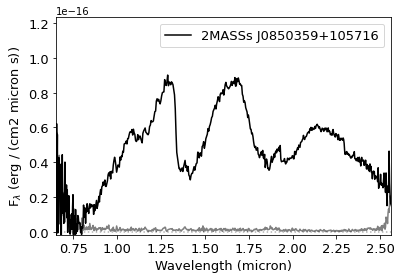

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [10]:
s.reset()
s.plot()

In [11]:
s.slitpixelwidth=1
s.slitwidth=1
s.smooth(10)

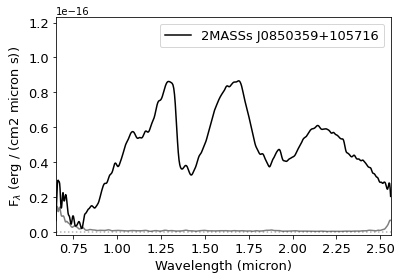

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [12]:
s.plot()

In [13]:
s.reset()

In [14]:
s.slitpixelwidth=5
s.slitwidth=5
s.smooth(10)

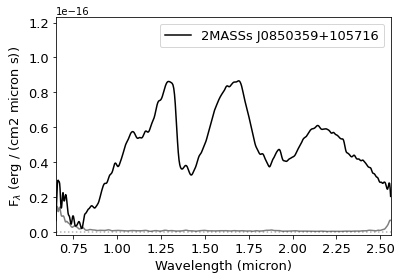

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [15]:
s.plot()

In [16]:
splat.SPLAT_PATH

'/users/caganze/research/splat'